# eReefs Xarray maps

In [1]:
import os
import numpy as np
import xarray as xr

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import cmocean

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.ion()  # To trigger the interactive inline mode

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
year = 2018

# GBR4
base_url = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/GBR4_H2p0_B3p1_Cq3b_Dhnd/daily-monthly/EREEFS_AIMS-CSIRO_GBR4_H2p0_B3p1_Cq3b_Dhnd_bgc_daily-monthly-"

biofiles = [f"{base_url}{year}-{month:02}.nc" for month in range(1, 2)]
biofiles

['http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/GBR4_H2p0_B3p1_Cq3b_Dhnd/daily-monthly/EREEFS_AIMS-CSIRO_GBR4_H2p0_B3p1_Cq3b_Dhnd_bgc_daily-monthly-2018-01.nc']

In [3]:
ds_bio = xr.open_mfdataset(biofiles)
ds_bio

<xarray.Dataset>
Dimensions:          (k: 17, latitude: 723, longitude: 491, time: 31)
Coordinates:
    zc               (k) float64 dask.array<chunksize=(17,), meta=np.ndarray>
  * time             (time) datetime64[ns] 2018-01-01T02:00:00 ... 2018-01-31...
  * latitude         (latitude) float64 -28.7 -28.67 -28.64 ... -7.066 -7.036
  * longitude        (longitude) float64 142.2 142.2 142.2 ... 156.8 156.8 156.9
Dimensions without coordinates: k
Data variables: (12/101)
    alk              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    BOD              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    Chl_a_sum        (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    CO32             (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    DIC              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    DIN              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    ...               ...
    SGH_N            (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    SGH_N_pr         (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    SGHROOT_N        (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    SGROOT_N         (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    TSSM             (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    Zenith2D         (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                     CF-1.0
    NCO:                             netCDF Operators version 4.7.7 (Homepage...
    RunID:                           2
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:      2020-08-21T23:07:30+10:00
    aims_ncaggregate_datasetId:      products__ncaggregate__ereefs__GBR4_H2p0...
    ...                              ...
    paramfile:                       /home/bai155/EMS_solar2/gbr4_H2p0_B3p1_C...
    paramhead:                       eReefs 4 km grid. SOURCE Catchments with...
    technical_guide_link:            https://eatlas.org.au/pydio/public/aims-...
    technical_guide_publish_date:    2020-08-18
    title:                           eReefs AIMS-CSIRO GBR4 BioGeoChemical 3....
    DODS_EXTRA.Unlimited_Dimension:  time

In [4]:
base_url2 = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"
hydrofiles = [f"{base_url2}{year}-{month:02}.nc" for month in range(1, 2)]
hydrofiles

['http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-2018-01.nc']

In [5]:
ds_hydro = xr.open_mfdataset(hydrofiles)
ds_hydro

<xarray.Dataset>
Dimensions:      (k: 17, latitude: 723, longitude: 491, time: 31)
Coordinates:
    zc           (k) float64 dask.array<chunksize=(17,), meta=np.ndarray>
  * time         (time) datetime64[ns] 2017-12-31T14:00:00 ... 2018-01-30T14:...
  * latitude     (latitude) float64 -28.7 -28.67 -28.64 ... -7.096 -7.066 -7.036
  * longitude    (longitude) float64 142.2 142.2 142.2 ... 156.8 156.8 156.9
Dimensions without coordinates: k
Data variables:
    mean_cur     (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    salt         (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    temp         (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    u            (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    v            (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    mean_wspeed  (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    eta          (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    wspeed_u     (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    wspeed_v     (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                     CF-1.0
    Run_ID:                          2
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:      2020-08-21T12:50:07+10:00
    aims_ncaggregate_datasetId:      products__ncaggregate__ereefs__gbr4_v2__...
    aims_ncaggregate_firstDate:      2018-01-01T00:00:00+10:00
    ...                              ...
    paramhead:                       GBR 4km resolution grid
    shoc_version:                    v1.1 rev(5620)
    technical_guide_link:            https://eatlas.org.au/pydio/public/aims-...
    technical_guide_publish_date:    2020-08-18
    title:                           eReefs AIMS-CSIRO GBR4 Hydrodynamic v2 d...
    DODS_EXTRA.Unlimited_Dimension:  time

In [6]:
reef_lat = -18.82
reef_lon = 147.64

In [11]:
alk = ds_bio.alk
alk = alk.sel(longitude=reef_lon, latitude=reef_lat, method='nearest')

mean_cur = ds_hydro.mean_cur
mean_cur = mean_cur.sel(longitude=reef_lon, latitude=reef_lat, method='nearest')
alk

<xarray.DataArray 'alk' (time: 31, k: 17)>
dask.array<getitem, shape=(31, 17), dtype=float32, chunksize=(31, 17), chunktype=numpy.ndarray>
Coordinates:
    zc         (k) float64 dask.array<chunksize=(17,), meta=np.ndarray>
  * time       (time) datetime64[ns] 2018-01-01T02:00:00 ... 2018-01-31T02:00:00
    latitude   float64 -18.83
    longitude  float64 147.6
Dimensions without coordinates: k
Attributes:
    short_name:   alk
    units:        mmol m-3
    long_name:    Total alkalinity
    _ChunkSizes:  [  1   1 133 491]

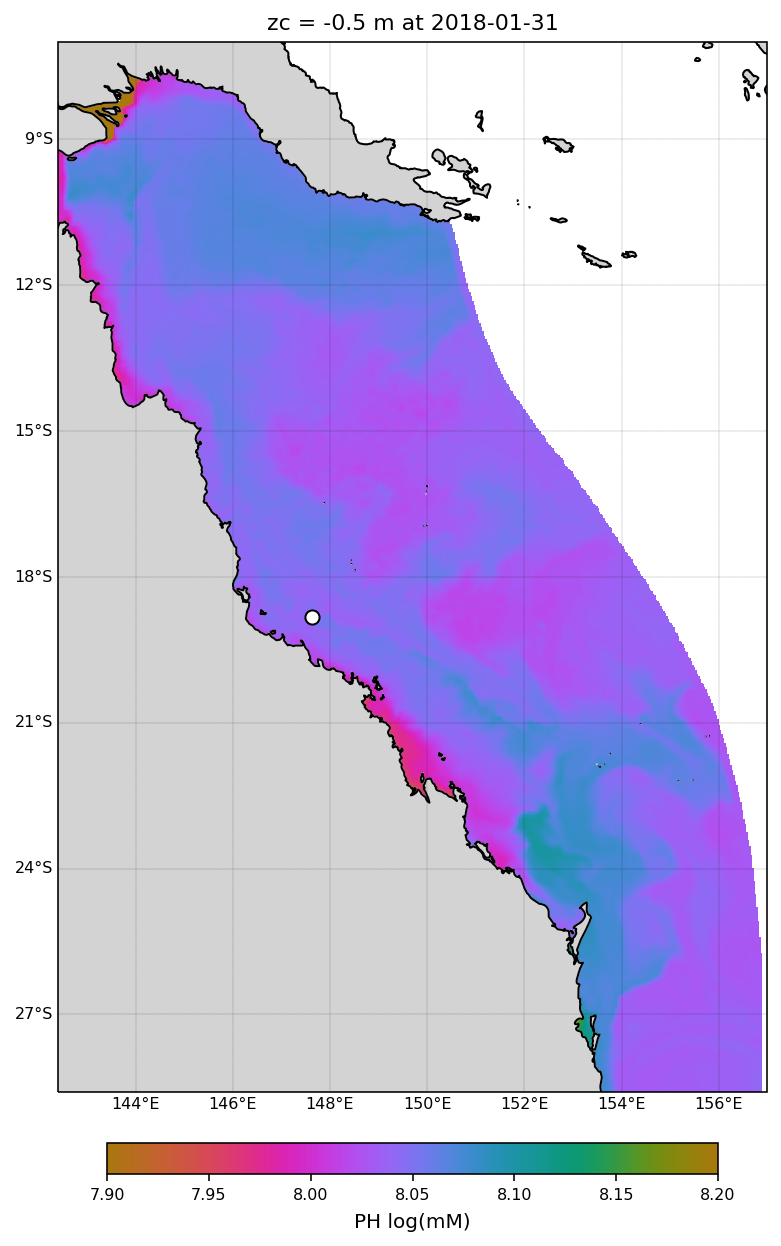

<Figure size 432x288 with 0 Axes>

In [7]:
size = (9, 10)
color = cmocean.cm.phase

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([142.4, 157, -7, -28.6], ccrs.PlateCarree())

cf = ds_bio.PH.isel(time=-1,k=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 7.9, vmax = 8.2,
    add_colorbar=False
)


# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_bio.PH.long_name+' '+ds_bio.PH.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('zc = '+str(ds_bio.zc.values.item(-1))+' m at '+str(ds_bio.coords['time'].values[-1])[:10],
          fontsize=11
         )

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

# Site Davies Reef
ax.scatter(reef_lon, reef_lat, c='w', s=50, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

In [8]:
min_lon = 146
min_lat = -21
max_lon = 150
max_lat = -16

lon_bnds = [min_lon, max_lon]
lat_bnds = [min_lat, max_lat]

In [9]:
ds_bio_clip = ds_bio.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))
ds_hydro_clip = ds_hydro.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))

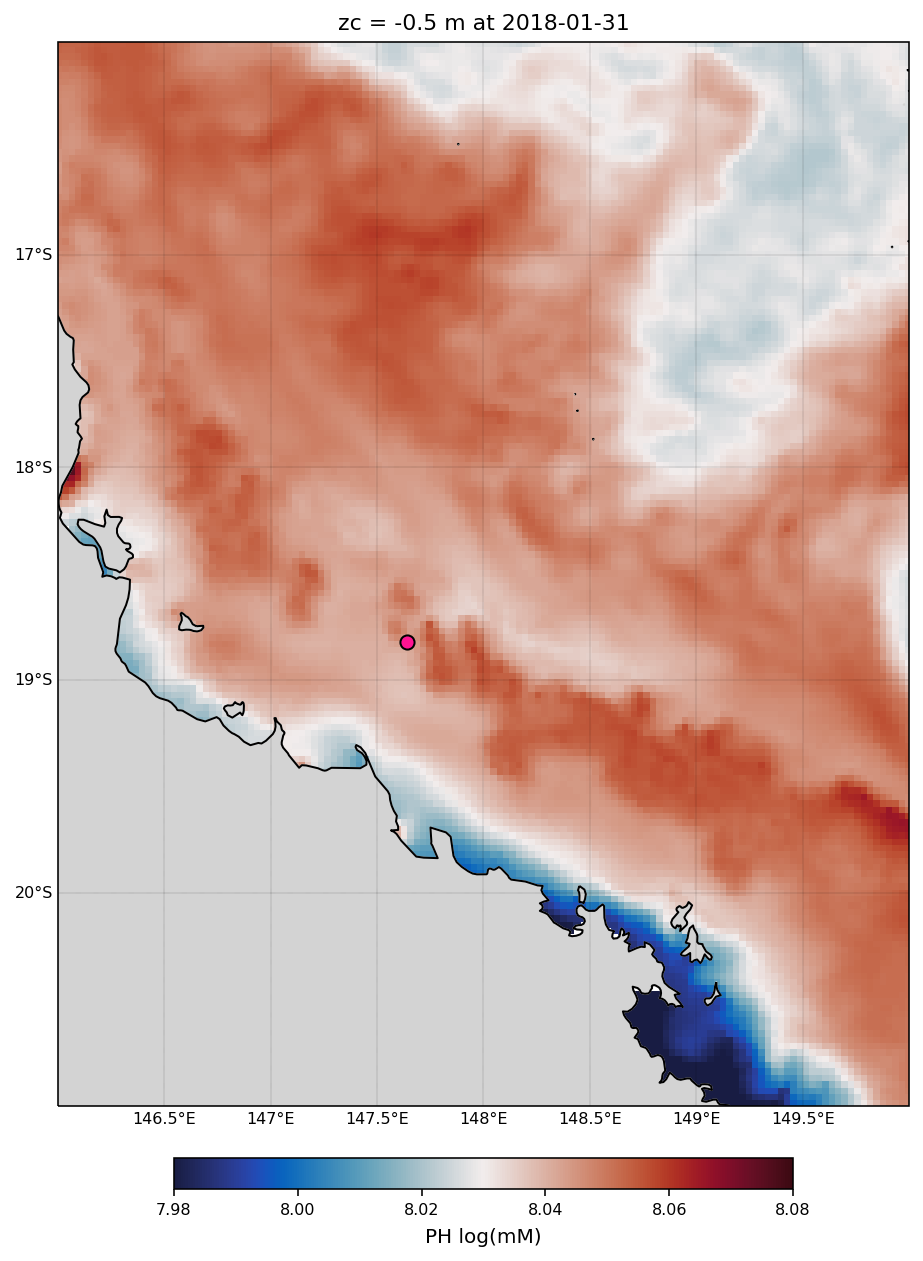

<Figure size 432x288 with 0 Axes>

In [14]:
size = (9, 10)
color = cmocean.cm.balance

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())

cf = ds_bio_clip.PH.isel(time=-1,k=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 7.98, vmax = 8.08,
    add_colorbar=False
)


# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_bio_clip.PH.long_name+' '+ds_bio_clip.PH.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('zc = '+str(ds_bio_clip.zc.values.item(-1))+' m at '+
          str(ds_bio_clip.coords['time'].values[-1])[:10],
          fontsize=11
         )

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

# Site Davies Reef
ax.scatter(reef_lon, reef_lat, c='deeppink', s=50, edgecolors='k', 
           linewidth=1, transform=ccrs.PlateCarree())

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

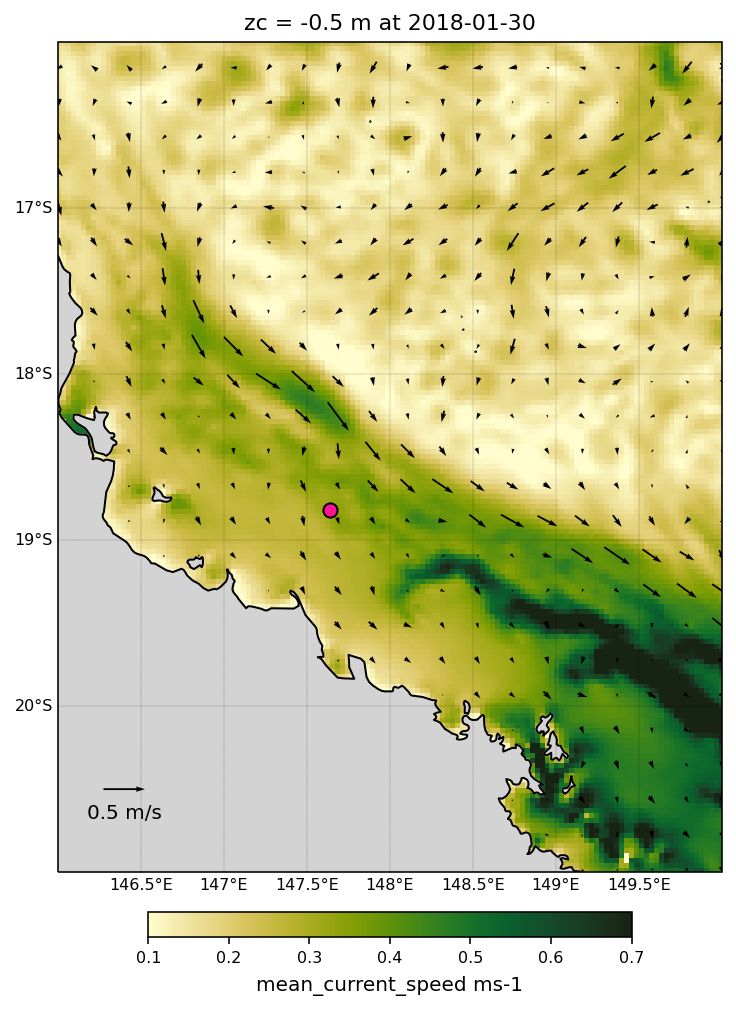

<Figure size 432x288 with 0 Axes>

In [15]:
size = (7, 8)
timevar = -1
zcvar = -1

color = cmocean.cm.speed

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())

cf = ds_hydro_clip.mean_cur.isel(time=timevar,k=zcvar).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 0.1, vmax = 0.7,
    add_colorbar=False
)

resample = ds_hydro_clip.isel(time=timevar,k=zcvar,longitude=slice(None, None, 7),
                              latitude=slice(None, None, 7))

quiver = resample.plot.quiver(x='longitude', y='latitude', u='u', v='v', 
                              transform=ccrs.PlateCarree(), scale=8)      

veclenght = 0.5
maxstr = '%3.1f m/s' % veclenght
plt.quiverkey(quiver,0.1,0.1,veclenght,maxstr,labelpos='S', 
              coordinates='axes').set_zorder(11)


# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_hydro_clip.mean_cur.long_name+' '+
               ds_hydro_clip.mean_cur.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('zc = '+str(ds_hydro_clip.mean_cur.zc.values.item(zcvar))+' m at '+
          str(ds_hydro_clip.mean_cur.coords['time'].values[timevar])[:10],
          fontsize=11
         )

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

# Site Davies Reef
ax.scatter(reef_lon, reef_lat, c='deeppink', s=50, edgecolors='k', 
           linewidth=1, transform=ccrs.PlateCarree()).set_zorder(11)

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

In [16]:
section = ds_bio_clip.sel(latitude=slice(*[-19.,-18.5])).mean(dim=('latitude'),skipna=True)
section

<xarray.Dataset>
Dimensions:          (k: 17, longitude: 134, time: 31)
Coordinates:
    zc               (k) float64 dask.array<chunksize=(17,), meta=np.ndarray>
  * time             (time) datetime64[ns] 2018-01-01T02:00:00 ... 2018-01-31...
  * longitude        (longitude) float64 146.0 146.0 146.1 ... 149.9 150.0 150.0
Dimensions without coordinates: k
Data variables: (12/101)
    alk              (time, k, longitude) float32 dask.array<chunksize=(31, 17, 134), meta=np.ndarray>
    BOD              (time, k, longitude) float32 dask.array<chunksize=(31, 17, 134), meta=np.ndarray>
    Chl_a_sum        (time, k, longitude) float32 dask.array<chunksize=(31, 17, 134), meta=np.ndarray>
    CO32             (time, k, longitude) float32 dask.array<chunksize=(31, 17, 134), meta=np.ndarray>
    DIC              (time, k, longitude) float32 dask.array<chunksize=(31, 17, 134), meta=np.ndarray>
    DIN              (time, k, longitude) float32 dask.array<chunksize=(31, 17, 134), meta=np.ndarray>
    ...               ...
    SGH_N            (time, longitude) float32 dask.array<chunksize=(31, 134), meta=np.ndarray>
    SGH_N_pr         (time, longitude) float32 dask.array<chunksize=(31, 134), meta=np.ndarray>
    SGHROOT_N        (time, longitude) float32 dask.array<chunksize=(31, 134), meta=np.ndarray>
    SGROOT_N         (time, longitude) float32 dask.array<chunksize=(31, 134), meta=np.ndarray>
    TSSM             (time, longitude) float32 dask.array<chunksize=(31, 134), meta=np.ndarray>
    Zenith2D         (time, longitude) float32 dask.array<chunksize=(31, 134), meta=np.ndarray>

In [17]:
ds_bio_clip

<xarray.Dataset>
Dimensions:          (k: 17, latitude: 167, longitude: 134, time: 31)
Coordinates:
    zc               (k) float64 dask.array<chunksize=(17,), meta=np.ndarray>
  * time             (time) datetime64[ns] 2018-01-01T02:00:00 ... 2018-01-31...
  * latitude         (latitude) float64 -20.99 -20.96 -20.93 ... -16.04 -16.01
  * longitude        (longitude) float64 146.0 146.0 146.1 ... 149.9 150.0 150.0
Dimensions without coordinates: k
Data variables: (12/101)
    alk              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 167, 134), meta=np.ndarray>
    BOD              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 167, 134), meta=np.ndarray>
    Chl_a_sum        (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 167, 134), meta=np.ndarray>
    CO32             (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 167, 134), meta=np.ndarray>
    DIC              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 167, 134), meta=np.ndarray>
    DIN              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 167, 134), meta=np.ndarray>
    ...               ...
    SGH_N            (time, latitude, longitude) float32 dask.array<chunksize=(31, 167, 134), meta=np.ndarray>
    SGH_N_pr         (time, latitude, longitude) float32 dask.array<chunksize=(31, 167, 134), meta=np.ndarray>
    SGHROOT_N        (time, latitude, longitude) float32 dask.array<chunksize=(31, 167, 134), meta=np.ndarray>
    SGROOT_N         (time, latitude, longitude) float32 dask.array<chunksize=(31, 167, 134), meta=np.ndarray>
    TSSM             (time, latitude, longitude) float32 dask.array<chunksize=(31, 167, 134), meta=np.ndarray>
    Zenith2D         (time, latitude, longitude) float32 dask.array<chunksize=(31, 167, 134), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                     CF-1.0
    NCO:                             netCDF Operators version 4.7.7 (Homepage...
    RunID:                           2
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:      2020-08-21T23:07:30+10:00
    aims_ncaggregate_datasetId:      products__ncaggregate__ereefs__GBR4_H2p0...
    ...                              ...
    paramfile:                       /home/bai155/EMS_solar2/gbr4_H2p0_B3p1_C...
    paramhead:                       eReefs 4 km grid. SOURCE Catchments with...
    technical_guide_link:            https://eatlas.org.au/pydio/public/aims-...
    technical_guide_publish_date:    2020-08-18
    title:                           eReefs AIMS-CSIRO GBR4 BioGeoChemical 3....
    DODS_EXTRA.Unlimited_Dimension:  time

In [18]:
lonsec = ds_bio_clip.sel(latitude=slice(*[-19.,-18.5])).mean(dim=('latitude'),skipna=True)
latsec = ds_bio_clip.sel(longitude=slice(*[147.2,148.])).mean(dim=('longitude'),skipna=True)

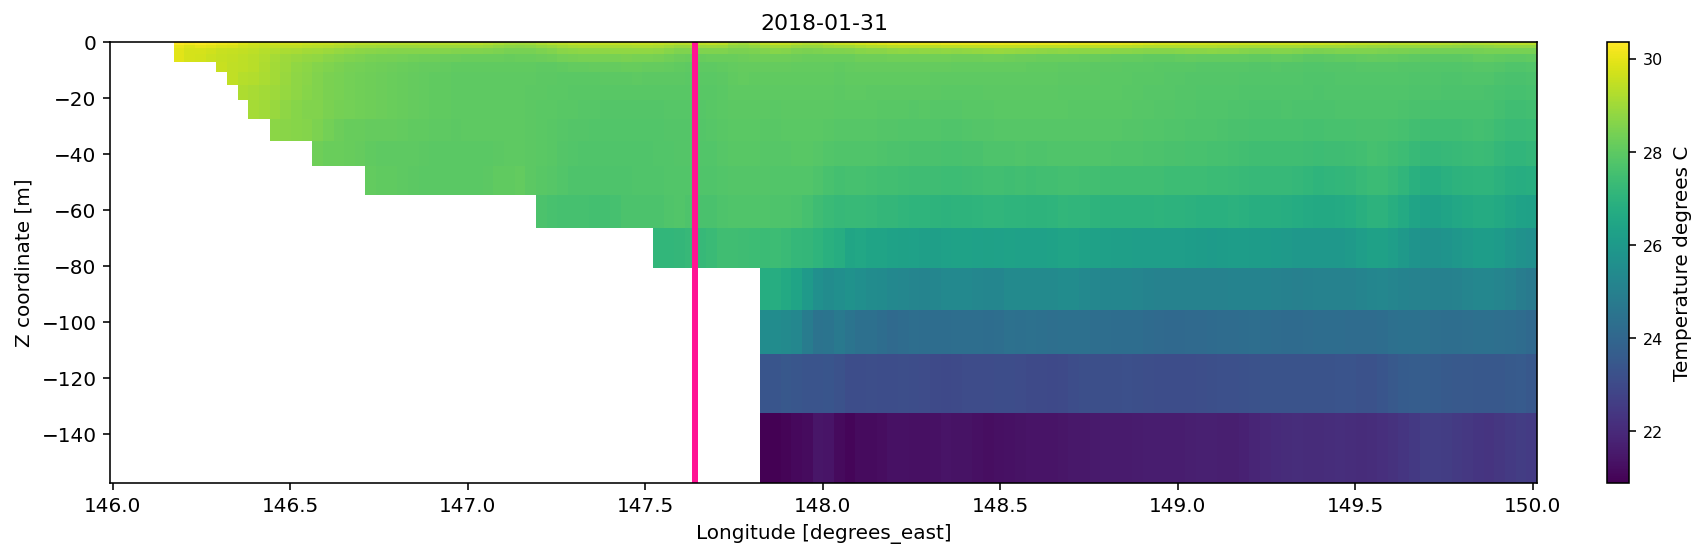

<Figure size 432x288 with 0 Axes>

In [19]:
size = (12, 4)
timevar = -1

color = cmocean.cm.speed

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')
ax = plt.axes()

sec = lonsec.temp.isel(time=timevar).plot(y="zc",add_colorbar=False)

# Color bar
cbar = fig.colorbar(sec, ax=ax, fraction=0.027, pad=0.045)
cbar.set_label(ds_bio.temp.long_name+' '+
               ds_bio.temp.units, rotation=90, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title(str(lonsec.temp.coords['time'].values[timevar])[:10],
          fontsize=11
         )

# Site Davies Reef
ax.plot([reef_lon,reef_lon], [-1000,16], c='deeppink',  
           linewidth=3)

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

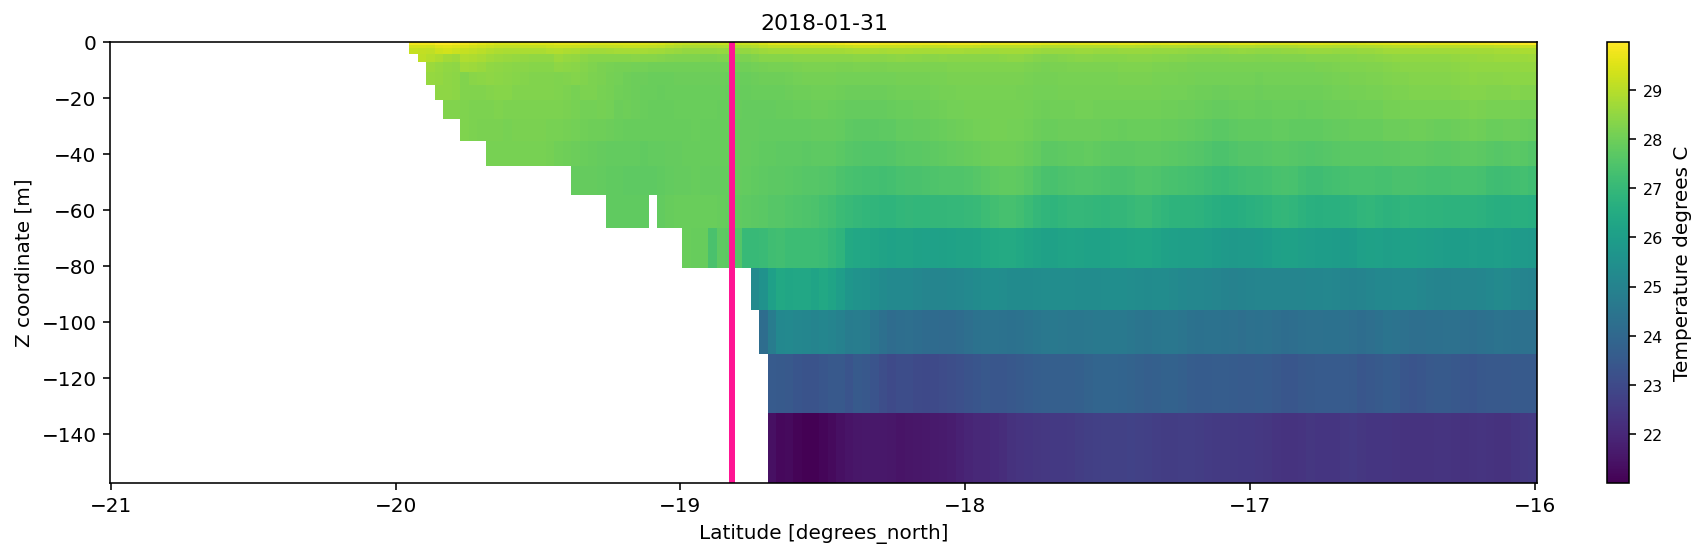

<Figure size 432x288 with 0 Axes>

In [20]:
size = (12, 4)
timevar = -1

color = cmocean.cm.speed

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')
ax = plt.axes()

sec = latsec.temp.isel(time=timevar).plot(y="zc",add_colorbar=False)

# Color bar
cbar = fig.colorbar(sec, ax=ax, fraction=0.027, pad=0.045)
cbar.set_label(ds_bio.temp.long_name+' '+
               ds_bio.temp.units, rotation=90, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title(str(latsec.temp.coords['time'].values[timevar])[:10],
          fontsize=11
         )

# Site Davies Reef
ax.plot([reef_lat,reef_lat], [-1000,16], c='deeppink',  
           linewidth=3)

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()